<H1> Exploratory Data Analysis on NYC Restaurants Data
    
<HR>

#### We will analyze restaurant inspections in New York City, starting November 1, 2014 and ending January 31, 2015. The data is in the file NYC Restaurants.csv.

The code block below
<ol><li>Imports pandas and numpy packages <br>
<li>Reads NYC Restaurants Data from the current working directory (<b> Please make sure that NYC_Restaurants.csv is present in your current working directory <b> )

In [1]:
import pandas as pd
import numpy as np
nyc_restaurants=pd.read_csv("NYC_Restaurants.csv",dtype='unicode')
nyc_restaurants=nyc_restaurants.iloc[:,1:]
nyc_restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


-------------------------------------------------------------------------------------------------------------------------------

## Create a unique name for each restaurant.

-------------------------------------------------------------------------------------------------------------------------------

In [2]:
nyc_restaurants['RESTAURANT']=nyc_restaurants['DBA']+' '+nyc_restaurants['BUILDING']+' '+nyc_restaurants['STREET']+' '+nyc_restaurants['ZIPCODE']+' '+nyc_restaurants['BORO']
nyc_restaurants['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

-------------------------------------------------------------------------------------------------------------------------------

## How many restaurants are included in the data?

-------------------------------------------------------------------------------------------------------------------------------

In [3]:
len(nyc_restaurants['RESTAURANT'].unique())

10114

-------------------------------------------------------------------------------------------------------------------------------

## How many chains are there?

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Subset DBA & RESTAURANT columns from the dataset and remove duplicates & store it in the dataframe <b>restuarants_and_address</b>
    <LI> Count the no of DBAs which have more than one restuaurants in them (chains) & store them in a series object (<b>chains_sr</b>)
    <LI> We get the length of chains_sr to find out the total no of chains

In [4]:
restaurants_and_address=nyc_restaurants[['DBA','RESTAURANT']].drop_duplicates()
chains_sr=restaurants_and_address['DBA'].value_counts().loc[lambda x : x>1]
len(chains_sr)


368


-------------------------------------------------------------------------------------------------------------------------------
## Plot a bar graph of the top 20 most popular chains.

-------------------------------------------------------------------------------------------------------------------------------

Use restaurants_and_address dataframe to plot the required graph

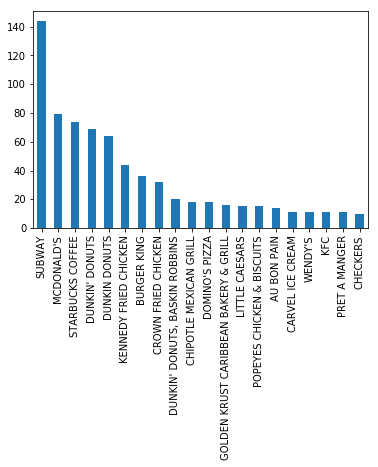

In [7]:
restaurants_and_address['DBA'].value_counts()[0:20].plot(kind="Bar")

-------------------------------------------------------------------------------------------------------------------------------

## What fraction of all restaurants are chain restaurants?

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Summing <B>chains_sr</B> gives us all the restaurants in all the chains
    <LI> Unique of the restaurant column gives us the total no of restaurans (Taking unique weeds out multiple violations)
    <LI> Dividing 1 by 2 to obtain the fraction of chain restaurants
</OL>

In [8]:
total_chain_restaurants=chains_sr.sum()
total_restaurants=nyc_restaurants['RESTAURANT'].unique()

fraction=round(float(total_chain_restaurants)/len(total_restaurants),5)
print "Fraction of chain restaurants: "+str(fraction)
print "% of chain restaurants: "+str(fraction*100)+"%"

Fraction of chain restaurants: 0.16472
% of chain restaurants: 16.472%


-------------------------------------------------------------------------------------------------------------------------------

## Plot the number of non-chain restaurants in each boro.

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Make the "Missing" values from the BORO column null
    <LI> The <B>chains_sr</B> indices contain the DBA for all chains, so using them to filter out chains from the data set
    <LI> Store this data obtained in 2 into the dataframe <b> restuarants_without_chains</b>
    <LI> Subset only BORO & RESTAURANT columns and remove duplicates
    <LI> Calculate independent restaurants in each borrow & plot them
</OL>

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64


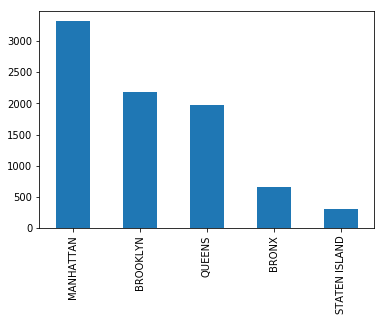

In [9]:

nyc_restaurants.loc[nyc_restaurants['BORO']=='Missing','BORO']=np.nan
restaurants_without_chains=nyc_restaurants[~nyc_restaurants['DBA'].isin(list(chains_sr.index))]
boro_nonchain_rest=restaurants_without_chains[['BORO','RESTAURANT']].drop_duplicates()
independent_restaurants_bor=boro_nonchain_rest['BORO'].value_counts()
print(independent_restaurants_bor)
independent_restaurants_bor.plot(kind='Bar')

------------------------------------------------------------------------------------------------------------------------------

## Plot the fraction of non-chain restaurants in each boro.

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Create a series for no. of chain restaurants for each borrow - call this series <b>borrow_chain_rest_q7</b>
    <LI> Create a series for no. of non chain restaurants for each borrow - call this series <b>borrow_nonchain_rest_q7</b>
    <LI> Divide 2 by (1+2) to get to the required answer
    <LI> Print and plot the resultant series
</OL>

BRONX            0.770760
BROOKLYN         0.862001
MANHATTAN        0.830542
QUEENS           0.847910
STATEN ISLAND    0.791878
Name: BORO, dtype: float64


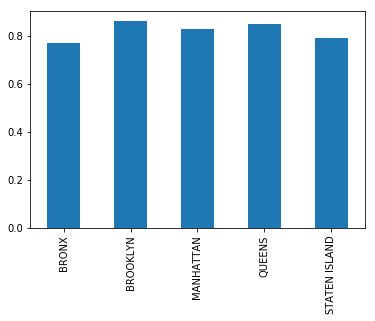

In [10]:
chain_restaurants=nyc_restaurants[nyc_restaurants['DBA'].isin(list(chains_sr.index))]
boro_chain_rest=chain_restaurants[['BORO','RESTAURANT']].drop_duplicates()
boro_chain_rest_q7=boro_chain_rest['BORO'].value_counts()
boro_nonchain_rest_q7=boro_nonchain_rest['BORO'].value_counts()
independent_rest_bor=(boro_nonchain_rest_q7/(boro_nonchain_rest_q7+boro_chain_rest_q7))
print(independent_rest_bor)
independent_rest_bor.plot(kind="Bar")

As we can see from the previous question, that Manhattan has the highest no. of independent restaurants (3323) but Brooklyn has the highest ratio of independent restaurants (0.86).

-------------------------------------------------------------------------------------------------------------------------------

## Plot the popularity of cuisines.

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Subset CUISINE & RESTAURANT columns & drop duplicates</b> & store the data in the dataframe <b>restaurant_by_cuisine</b>
    <LI> Create a series <B> top_20_cusn_by_rest </B> for storing top 20 cuisine descriptions that occur in the max no of restaurants 
    <LI> Plot it
</OL>

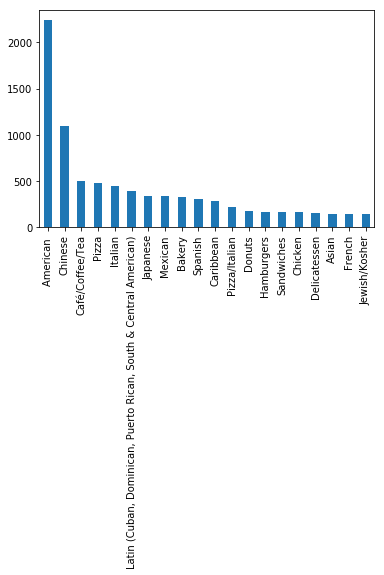

In [11]:
restaurant_by_cuisine=nyc_restaurants[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()
top_20_cusn_by_rest=restaurant_by_cuisine['CUISINE DESCRIPTION'].value_counts()[:20]
top_20_cusn_by_rest.plot(kind="Bar")

-------------------------------------------------------------------------------------------------------------------------------

## Plot the cuisines among restaurants which never got cited for violations.

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Subset data where VIOLATION CODE is not null and find all unique such restaurants  - store this in <b>restaurants_with_vio</b>
    <li> Subset data where VIOLATION CODE is null and store it in <b>no_violation_restaurants</B>
    <LI> Drop those restaurants from <b>no_violation_restaurants</B> that occur in <b>restaurants_with_vio</b>
    <LI> Subset columns CUISINE DESCRIPTION & RESTAURANT from <b>no_violation_restaurants</B>  and remove duplicates
    <LI> Find the top 20 cuisines and plot them 
</OL>

C:\Users\ameya\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


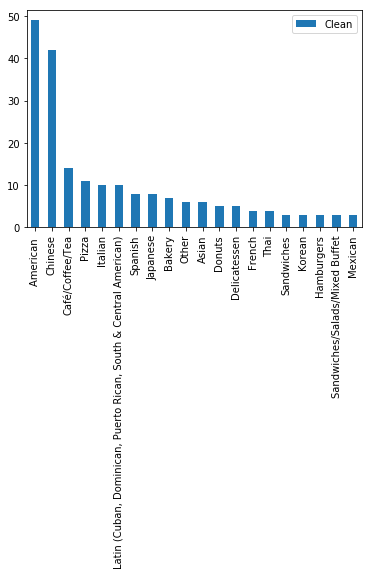

In [12]:
restaurants_with_vio = nyc_restaurants[nyc_restaurants['VIOLATION CODE'].notnull()]['RESTAURANT'].drop_duplicates()
no_violation_restaurants = nyc_restaurants[nyc_restaurants['VIOLATION CODE'].isnull()]

def drop_restaurant(s):
    if s in restaurants_with_vio.values:
        s = ''
    return s

no_violation_restaurants['RESTAURANT'] = no_violation_restaurants['RESTAURANT'].apply(drop_restaurant)
no_violation_restaurants = no_violation_restaurants[no_violation_restaurants['RESTAURANT'] != '']

no_violation_restaurants=no_violation_restaurants[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()
top_no_violations=no_violation_restaurants['CUISINE DESCRIPTION'].value_counts().to_frame(name='Clean')
top_20_no_violations = top_no_violations[:20]
top_20_no_violations.plot(kind="Bar")

-------------------------------------------------------------------------------------------------------------------------------

## What cuisines tend to be the "cleanest"?

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Select all cuisines for which there were at least 20 restaurants representing that cuisine
    <li> Merge with cleanest cuisines and divide 
</OL>

In [13]:

#Step 1 : Select all cuisines for which there were at least 20 restaurants representing that cuisine 

popular_cuisines=restaurant_by_cuisine['CUISINE DESCRIPTION'].value_counts().loc[lambda x : x>19].to_frame(name='Popularity')
popular_cuisines

,Popularity
American,2238
Chinese,1098
Café/Coffee/Tea,498
Pizza,483
Italian,451
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",391
Japanese,340
Mexican,339
Bakery,326
Spanish,311


In [14]:
#Step 2: Merge with cleanest cuisines and divide 
pd_merged = popular_cuisines.join(top_no_violations,how='right')

pd_merged['Proportion'] = pd_merged['Clean'] / pd_merged['Popularity']
pd_merged.sort_values('Proportion',ascending = False)[:10]

,Popularity,Clean,Proportion
Soul Food,22.0,2,0.090909
Vietnamese/Cambodian/Malaysia,32.0,2,0.062500
Other,103.0,6,0.058252
Barbecue,21.0,1,0.047619
Soups & Sandwiches,21.0,1,0.047619
Continental,21.0,1,0.047619
Asian,146.0,6,0.041096
Chinese,1098.0,42,0.038251
Greek,55.0,2,0.036364
Peruvian,28.0,1,0.035714


-------------------------------------------------------------------------------------------------------------------------------

## What are the most common violations in each borough?

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Use cross tab on columns VIOLATION & BORO
    <li> Use the idxmax on the cross tab result and merge with <b>violation_info</b> to get the most common violation description for each boro
</OL>

In [15]:
#Step 1
cross_tab=pd.crosstab(nyc_restaurants['VIOLATION CODE'],nyc_restaurants['BORO'])
cross_tab

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,
02A,1,11,18,7,1
02B,193,597,831,567,94
02C,8,24,18,25,0
02D,0,5,2,0,0
02F,0,0,1,1,0
02G,168,635,1232,621,118
02H,29,93,197,115,9
02I,0,1,5,3,0
03A,2,25,22,11,1


In [16]:
#Step 2
most_common_violations=pd.DataFrame(cross_tab.idxmax()).reset_index()
most_common_violations.columns=['BORO','VIOLATION CODE']
violation_info=nyc_restaurants[['VIOLATION CODE','VIOLATION DESCRIPTION']].drop_duplicates()
most_common_violations=pd.merge(most_common_violations,violation_info,on="VIOLATION CODE")[['BORO','VIOLATION CODE','VIOLATION DESCRIPTION']]
pd.options.display.max_colwidth = 500
most_common_violations


,BORO,VIOLATION CODE,VIOLATION DESCRIPTION
0,BRONX,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
1,BROOKLYN,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
2,MANHATTAN,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
3,QUEENS,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."
4,STATEN ISLAND,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit."


-------------------------------------------------------------------------------------------------------------------------------

## What are the most common violations per borough, after normalizing for the relative abundance of each violation?
    

-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Used pivot to create the cross tab in this question (Just as an alternate approach)
    <li> Get overall frequencies:<b>violationFrequency</b>
    <LI> Normalize 
    <LI> Find the biggest violation in each borrow
</OL>

In [17]:
#Step1
violations = nyc_restaurants[['BORO','VIOLATION CODE','VIOLATION DESCRIPTION']]
violations['Sum'] = 1
pivoted = pd.pivot_table(violations,
                         index=['VIOLATION CODE','VIOLATION DESCRIPTION'],
                         columns='BORO',
                         values='Sum',
                         aggfunc=sum,
                        fill_value = 0)
#Step2
violationFrequency = pivoted.sum(axis = 1)

def divide(s):
    return s / violationFrequency
#Step 3:
normalized_pivoted = pivoted.apply(divide)
#Step 4:
normalized_violations=pd.DataFrame(normalized_pivoted.idxmax()).reset_index()
normalized_violations.columns=['BORO','VIOLATION CODE & DESCRIPTION']
normalized_violations

C:\Users\ameya\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BORO,VIOLATION CODE & DESCRIPTION
0,BRONX,"(04I, Unprotected food re-served.)"
1,BROOKLYN,"(02D, Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.)"
2,MANHATTAN,"(03E, Potable water supply inadequate. Water or ice not potable or from unapproved source. Cross connection in potable water supply system observed.)"
3,QUEENS,"(03G, Raw food not properly washed prior to serving.)"
4,STATEN ISLAND,"(03C, Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.)"


-------------------------------------------------------------------------------------------------------------------------------

## How many phone area codes correspond to a single zipcode?

    
-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Define a column AREA_CODE that contains the first three numbers of the phone number (Using lambda)
    <li> Subset ZIP CODE & AREA_CODE columns and remove duplicates
    <LI> Perform a value_counts and filter out only those area codes that have just one zip code in them
    <LI> Find the length of all such area codes that have only one zipcode in them
</OL>

In [18]:
nyc_restaurants['AREA_CODE']=nyc_restaurants['PHONE'].map(lambda x : x[0:3])
len(nyc_restaurants[['ZIPCODE','AREA_CODE']].drop_duplicates()['AREA_CODE'].value_counts().loc[lambda x : x<=1])

34

-------------------------------------------------------------------------------------------------------------------------------

## Find common misspellings of street names
    
-------------------------------------------------------------------------------------------------------------------------------

<B>Approach:</B>
<OL><LI> Create a new column, called STREET TYPE, which is the the last word in the name of the street
    <li> Create another column, called STREET BASE, which contains everything but the last word in the name of the street.
    <LI> Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode.
    <LI> Create a table <b>street_words</b> containing just these three columns, and remove any duplicates or instances where street base is empty.
    <LI> Merge <b>street_words</b> with itself, on the STREET BASE & ZIP column to create dataframe <b>self_merge</b>  
    <LI> Store the cross-tabulation of the two distinct street types in <b>cross_tab_spelling_variations</b>
</OL>

In [19]:
nyc_restaurants_q14=nyc_restaurants

#Step 1:
nyc_restaurants_q14['STREET TYPE']=nyc_restaurants_q14['STREET'].map(lambda x : x[x.rfind(' ')+1:])
nyc_restaurants_q14['STREET TYPE'].head()

0    AVENUE
1    AVENUE
2    AVENUE
3    AVENUE
4    AVENUE
Name: STREET TYPE, dtype: object

In [20]:
#Step 2
nyc_restaurants_q14['STREET BASE']=nyc_restaurants_q14['STREET'].map(lambda x : x[:x.rfind(' ')+1])
nyc_restaurants_q14['STREET BASE'].head()

0    FLATBUSH 
1    FLATBUSH 
2    FLATBUSH 
3    FLATBUSH 
4    FLATBUSH 
Name: STREET BASE, dtype: object

In [21]:
#Step 3
nyc_restaurants_q14['STREET BASE & ZIP']=nyc_restaurants_q14['STREET BASE']+' '+nyc_restaurants_q14['ZIPCODE']
nyc_restaurants_q14['STREET BASE & ZIP'].head()

0    FLATBUSH  11225
1    FLATBUSH  11225
2    FLATBUSH  11225
3    FLATBUSH  11225
4    FLATBUSH  11225
Name: STREET BASE & ZIP, dtype: object

In [22]:
#Step 4
street_words=nyc_restaurants_q14[['STREET TYPE','STREET BASE','STREET BASE & ZIP']].drop_duplicates()
street_words=street_words[street_words['STREET BASE']!='']

In [23]:
#Step 5
self_merge=pd.merge(street_words,street_words,on='STREET BASE & ZIP')
self_merge=self_merge[self_merge['STREET TYPE_x']!=self_merge['STREET TYPE_y']]

#Step 6
cross_tab_spelling_variations=pd.crosstab(self_merge['STREET TYPE_y'],self_merge['STREET TYPE_x'])
cross_tab_spelling_variations

STREET TYPE_x,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEARD,BOULEVARD,BULEVARD,...,STATION,STREET,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X
STREET TYPE_y,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,152,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,1,0,152,0,0,0,0,0,0,...,0,11,0,0,0,0,0,0,0,0
B,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BLVD,0,0,0,0,0,0,0,1,47,1,...,0,0,0,0,0,0,0,0,0,0
BOULEARD,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
BOULEVARD,0,0,0,0,0,0,47,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Add a word you want to test to the test_wordlist below

In [24]:
#Testing on the given wordlist
test_wordlist=['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']

for word in test_wordlist:
    try:
        print "Most common variation for "+word+": "+cross_tab_spelling_variations[word].idxmax()
    except Exception as e : 
        print "Word not found!"

Most common variation for AVE: AVENUE
Most common variation for ST: STREET
Most common variation for RD: ROAD
Most common variation for PL: PLACE
Most common variation for BOULEARD: BLVD
Most common variation for BULEVARD: BLVD
